# Exploring a new features 

In [1]:
import uproot4
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
import awkward1


ccup9_2015 = r'D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\4Prongs2015o.root'

events = uproot4.open(ccup9_2015)['4Prongs/events']
# events.show()
#dfs.loc[0] # get dataframe part with entry = 0

dfs = events.arrays(filter_name=['T_Px', 'T_Py', 'T_Pz',  'T_Q', 'T_NumberOfSigmaTPCPion', 'T_TPCRefit', 'T_TPCNCls'], library='pd')

dfs4Tracks = (dfs.reset_index().groupby('entry').count() == 4) # only 4 tracks events
dfs4Tracks = dfs4Tracks[dfs.reset_index().groupby('entry').sum().T_Q == 0] # only zero total charge from 4 tracks events
dfs4Tracks =  dfs[dfs4Tracks].dropna(how='any')


In [242]:
%matplotlib widget

dfsPt = dfs4Tracks[['T_Px', 'T_Py']]
dfsPt = np.sqrt(dfsPt.groupby('entry').sum()['T_Px']**2 + dfsPt.groupby('entry').sum()['T_Py']**2)

TPCMask = (np.abs(dfs4Tracks.T_NumberOfSigmaTPCPion) < 3) & (dfs4Tracks.T_TPCNCls > 50) & (dfs4Tracks.T_TPCRefit == 1)
TPCEvents = pd.unique(dfs4Tracks.reset_index().entry)[TPCMask.groupby('entry').sum() == 4]
TPCTracks = dfs4Tracks.loc[TPCEvents]


dfsTPCPt = TPCTracks[['T_Px', 'T_Py']]
dfsTPCPt = np.sqrt(TPCTracks.groupby('entry').sum()['T_Px']**2 + TPCTracks.groupby('entry').sum()['T_Py']**2)


plt.style.use(hep.style.ROOT)
_= plt.hist(dfsPt, bins=100, range=(0,2), histtype='step', color='black')

_= plt.hist(dfsTPCPt, bins=100, range=(0,2), histtype='step', color='red')



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [243]:
# from modules.physics.kinematics.rapidity import GetPseudoRapidity

%matplotlib widget

dfs4TracksLowPt = dfs4Tracks.loc[dfsPt[(dfsPt<0.15)].reset_index().entry]


TPCMask = (np.abs(dfs4TracksLowPt.T_NumberOfSigmaTPCPion) < 3) & (dfs4TracksLowPt.T_TPCNCls > 50) & (dfs4TracksLowPt.T_TPCRefit == 1)
TPCEvents = pd.unique(dfs4TracksLowPt.reset_index().entry)[TPCMask.groupby('entry').sum() < 4]
TPCTracks = dfs4TracksLowPt.loc[TPCEvents]
TPCTracksPt = np.sqrt(TPCTracks.T_Px**2 + TPCTracks.T_Py**2).to_numpy()
# TPCTracksRap =  GetPseudoRapidity(TPCTracks)

# _= plt.hist(TPCTracksPt, bins=100, range=(0,2), histtype='step', color='black')


entry
6         False
9         False
26        False
27         True
39        False
          ...  
114609    False
114623    False
114635     True
114638    False
114647    False
Length: 20374, dtype: bool

In [266]:
print((dfsTPCPt<0.15).sum()*4)
print((dfsPt<0.15).sum()*4)


6332
16052


In [247]:
%matplotlib widget



ITSOnlyEvents = pd.unique(dfs4TracksLowPt.reset_index().entry)[TPCMask.groupby('entry').sum() == 0]
ITSOnlyTracks = dfs4TracksLowPt.loc[ITSOnlyEvents]
ITSOnlyTracksPt = np.sqrt(ITSOnlyTracks.T_Px**2 + ITSOnlyTracks.T_Py**2).to_numpy()
# ITSOnlyTracksRap =  GetPseudoRapidity(ITSOnlyTracks)

# _= plt.hist(ITSOnlyTracksPt, bins=100, range=(0,2), histtype='step', color='black')

In [254]:
%matplotlib widget

TotalLowPt = np.sqrt(dfs4TracksLowPt.T_Px**2 + dfs4TracksLowPt.T_Py**2).to_numpy()
# TotalLowPtRap =  GetPseudoRapidity(dfs4TracksLowPt)
# _= plt.hist(TotalLowPt, bins=100, range=(0,2), histtype='step', color='black')


In [271]:
tpcimpPt = []

for i in range(1,4):
    ITSnTPCEvents = pd.unique(dfs4TracksLowPt.reset_index().entry)[TPCMask.groupby('entry').sum() == i]
    ITSnTPCTracks = dfs4TracksLowPt.loc[ITSnTPCEvents]
    tpcimpPt.append(np.sqrt(ITSnTPCTracks.T_Px**2 + ITSnTPCTracks.T_Py**2).to_numpy())

In [282]:
labels[4]

'ITS3TPCITS||TPC'

In [288]:
%matplotlib widget

plt.style.use(hep.style.ROOT)

arrs = [TPCTracksPt, ITSOnlyTracksPt]
arrs.append(tpcimpPt[0])
arrs.append(tpcimpPt[1])
arrs.append(tpcimpPt[2])
arrs.append(TotalLowPt)
labels = ['ITS&&TPC', 'ITS','ITS1TPC','ITS2TPC','ITS3TPC', 'ITS||TPC']
heights = [150,30,20,50,100,400]


fig, axs = plt.subplots(6, figsize=(15,7), sharex=True)
fig.suptitle(f'tracks Pt from events with Pt<0.15', fontsize=32)

for i in range(6):
    axs[i].hist(arrs[i], bins=100, range=(0,2), color='black', histtype='step', label = labels[i])
    axs[i].legend(prop={'size': 10})
    axs[i].text(1.8, heights[i], f"{len(arrs[i])}\ntracks", size=18)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [290]:
6332 + 504+656+2656+5904 = 16052

16052

entry  subentry
4      0           0.008536
Name: EventWeight, dtype: float32
entry  subentry
4      0           0.008536
Name: EventWeight, dtype: float32


## cache size vs chunks len 


## Data validation

### Duplicates

Cause of some reasons AliESD could contains the same track few times.
All of these tracks will marked as ITS SA, since in grid I have condition to throw such tracks it is not a problem anymore. 
But let's leave this checks

![img](https://sun9-69.userapi.com/c855620/v855620379/242fba/B1cMRF7RoH0.jpg)

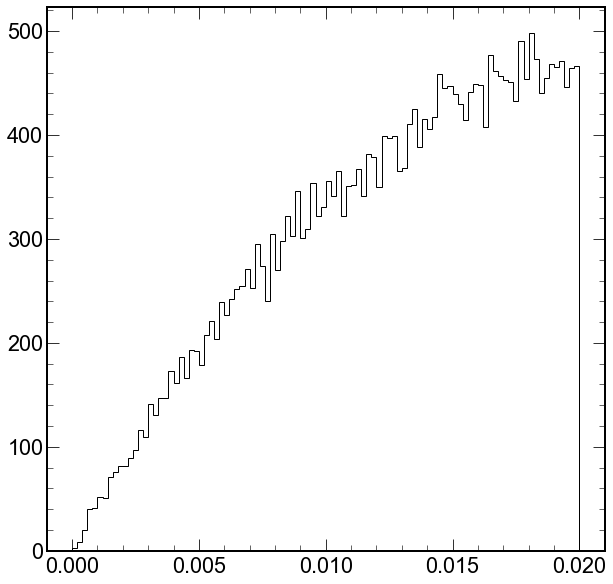

In [1]:
from modules.data.validation.duplicates import ShowDifferencesFor3Params, ShowDifferencesFor2Params

# reload(modules.validation.duplicates)

# ShowDifferencesFor3Params('T_Px', 'T_Py', 'T_Pz')
ShowDifferencesFor2Params('T_Dca0', 'T_Dca1')


